<a href="https://colab.research.google.com/github/oyyarko/keras_tut/blob/master/tensorflow_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
print(tf.__version__)

2.1.0-rc1


In [0]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
np.max(x_train)

255

In [9]:
np.mean(x_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

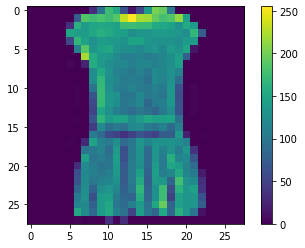

In [12]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

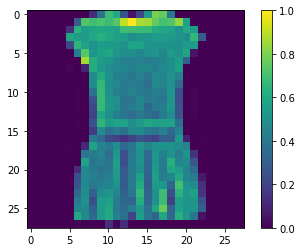

In [14]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4970 - accuracy: 0.8268
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3736 - accuracy: 0.8660
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3327 - accuracy: 0.8800
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3093 - accuracy: 0.8870
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2937 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2801 - accuracy: 0.8957
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2671 - accuracy: 0.9011
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2579 - accuracy: 0.9044
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2484 - accuracy: 0.9073
Epoch 10/10
6

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.3330 - accuracy: 0.8823
0.8823


In [21]:
print(test_loss)

0.3330288038253784


In [22]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(x_test)
accuracy_score(y_test, y_pred)

0.8823

In [23]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
pred = model.predict(x_test)

In [25]:
pred

array([[7.45010425e-07, 4.31220207e-12, 7.08835834e-09, ...,
        5.16097294e-03, 2.76116818e-08, 9.94516671e-01],
       [1.25470295e-04, 1.51960313e-13, 9.96288300e-01, ...,
        6.26719957e-19, 3.84456328e-10, 1.20060659e-13],
       [2.83751973e-08, 1.00000000e+00, 2.26673055e-11, ...,
        2.90552267e-28, 4.29980460e-13, 1.25246090e-20],
       ...,
       [9.61089027e-05, 3.85468241e-10, 3.11744843e-05, ...,
        3.21598109e-10, 9.99848366e-01, 4.42908349e-11],
       [5.62258435e-07, 9.99980688e-01, 1.09237845e-08, ...,
        8.55218966e-21, 6.65128885e-09, 3.61335658e-15],
       [6.56678749e-05, 7.41103845e-09, 1.65941474e-05, ...,
        2.58410187e-03, 2.06198292e-05, 9.99684380e-06]], dtype=float32)

In [26]:
pred[0]

array([7.4501042e-07, 4.3122021e-12, 7.0883583e-09, 8.2630132e-13,
       1.8802596e-10, 3.2154494e-04, 2.7548976e-08, 5.1609729e-03,
       2.7611682e-08, 9.9451667e-01], dtype=float32)

In [29]:
np.argmax(pred[2])

1